# SVD for learning word embeddings

## Part 1

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np

codata = pd.read_csv('gdrive/My Drive/co_occur.csv', header=None)

M = codata.values

Mounted at /content/gdrive


In [2]:
newdict = {}
i = 0

with open('/content/gdrive/My Drive/dictionary.txt') as file:
  lines = file.readlines()

  for line in lines:
    newdict[line.strip()] = i
    i = i + 1

## Part 2

In [3]:
M = np.log(1 + M)

In [4]:
M = pd.DataFrame(M)

In [5]:
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
from numpy import linalg

In [6]:
U, s, Vt = randomized_svd(M, n_components = 100)
U.shape, s.shape, Vt.shape

((10000, 100), (100,), (100, 10000))

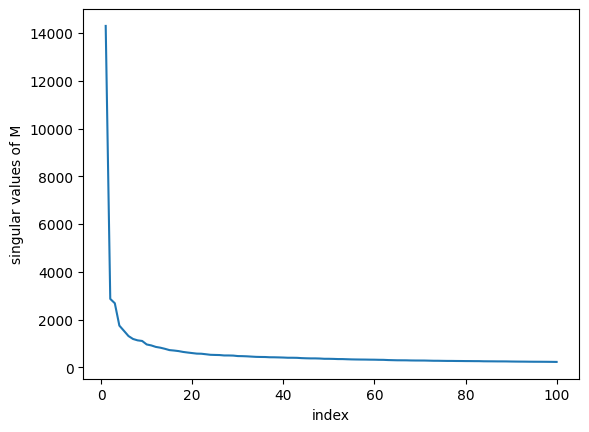

In [7]:
plt.xlabel('index')
plt.ylabel('singular values of M')

x_axis = np.arange(1,101)
y_axis = s

plt.plot(x_axis, y_axis)
plt.show()

M is a low rank matrix because the values of the singular values are decreasing at a fast pace.

## Part 3

In [8]:
U_df = pd.DataFrame(U)

In [9]:
words = list(newdict.keys())
for i in [34,14,26,30,47]:
  v = U_df[i]
  print(i)
  print('Positive values')
  for x in (np.argpartition(v, -10)[-10:].values):
    print(words[x], end=' ')

  print('\n\nNegative values')
  for x in (np.argpartition(v, 10)[:10].values):
    print(words[x], end=' ')
  print('\n')

34
Positive values
german british amateur norwegian chamber swiss belgian austrian canadian swedish 

Negative values
style wing ce support traditional improved hp islam text ad 

14
Positive values
province milk name population born municipality income food products brazil 

Negative values
artillery battle naval training brief squadron completed combat scenes subsequent 

26
Positive values
alcohol patients treatment involving disease cancer drug cases symptoms injury 

Negative values
its outstanding the award was mountains strategic achievement it highest 

30
Positive values
richard george mike tom peter robert william michael john david 

Negative values
decides tries attempts would helps does must can footballer designed 

47
Positive values
nbc actor film directed actress drama television comedy starring tv 

Negative values
leader party car label chart election group race business key 



34 : Nationality, 14 : War, 26 : Health & Diseases, 30 : Names, 47 : Movie & TV series

Not all of the singular vectors have easy-to-interpret
semantics because the words that are most relevant for a vector are not necessarily the words with the most interpretability, but the words where there is the most variance.



## Part 4

Part a)

In [10]:
V = Vt.T

In [11]:
U1 = U / np.linalg.norm(U, axis=1, keepdims=True)

In [12]:
for word, i in newdict.items():
    if word == "woman":
      woman = i

    if word == "man":
      man = i

v1 = U1[woman]
v2 = U1[man]

v = v1 - v2

v

array([-0.04742331, -0.11775758,  0.00121971,  0.04618037,  0.08819425,
        0.0114216 ,  0.05693668, -0.02866071,  0.00175354, -0.12008464,
        0.02326342, -0.03145521,  0.01001071, -0.0348618 ,  0.06214296,
       -0.02951111, -0.05322484,  0.0469835 ,  0.03689167, -0.15285157,
        0.05127881,  0.08983009, -0.01360815,  0.15551282, -0.01928386,
       -0.04061638,  0.04530551, -0.07846425, -0.0208986 , -0.09885669,
        0.03051703, -0.05632882, -0.08811818, -0.03870906,  0.07354383,
        0.09782053, -0.06367586, -0.0164387 ,  0.04508685,  0.20940585,
        0.09237586, -0.04306592,  0.20724166, -0.03324736,  0.11843074,
       -0.12372383, -0.04883006,  0.03609994,  0.02189471, -0.03927588,
        0.05817518,  0.17018933, -0.06039323, -0.08200237,  0.00971989,
        0.00863016, -0.02579729,  0.11690098,  0.02874348, -0.00464104,
        0.035099  , -0.07556095,  0.03813945, -0.00528504,  0.04361794,
       -0.07040119,  0.00998688,  0.03625928, -0.03253547,  0.04

In [13]:
embeddingwords = ['boy', 'girl', 'brother', 'sister', 'king', 'queen', 'he', 'she', 'john', 'mary', 'wall', 'tree']

index = []

x_axis = []

for i in embeddingwords:
  for word, j in newdict.items():
    if word == i:
      index.append(j)
      break

for i in index:
  u = U1[i]
  proj = (u@v) / np.linalg.norm(v)

  x_axis.append(proj)

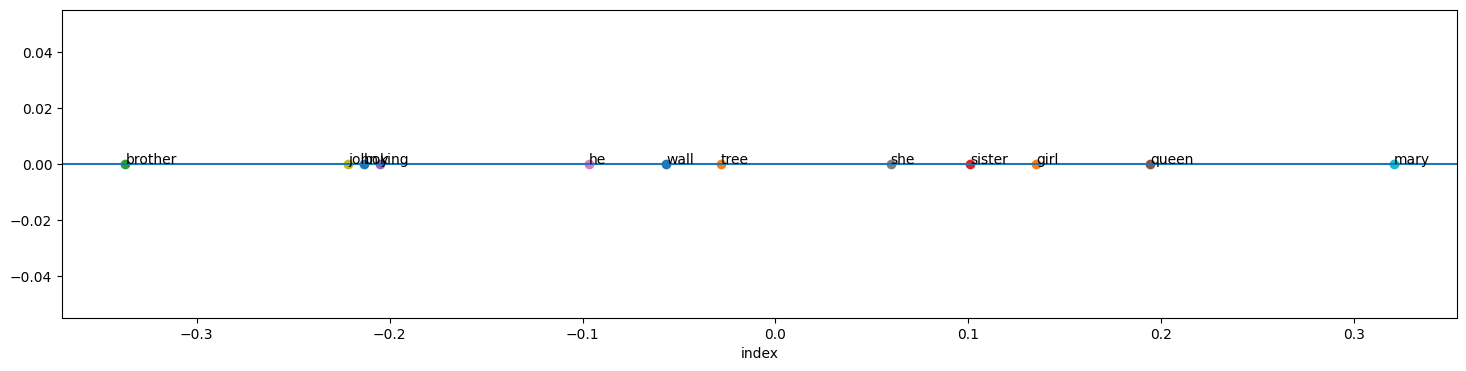

In [14]:
plt.figure(figsize=(2^16, 4))

for x, label in zip(x_axis, embeddingwords):
    plt.plot(x, 0, marker='o')
    plt.text(x, 0, label)

plt.axhline(0)

plt.xlabel('index')
plt.show()

In [15]:
V_norm = V / np.linalg.norm(V, axis=1, keepdims=True)

Part b)

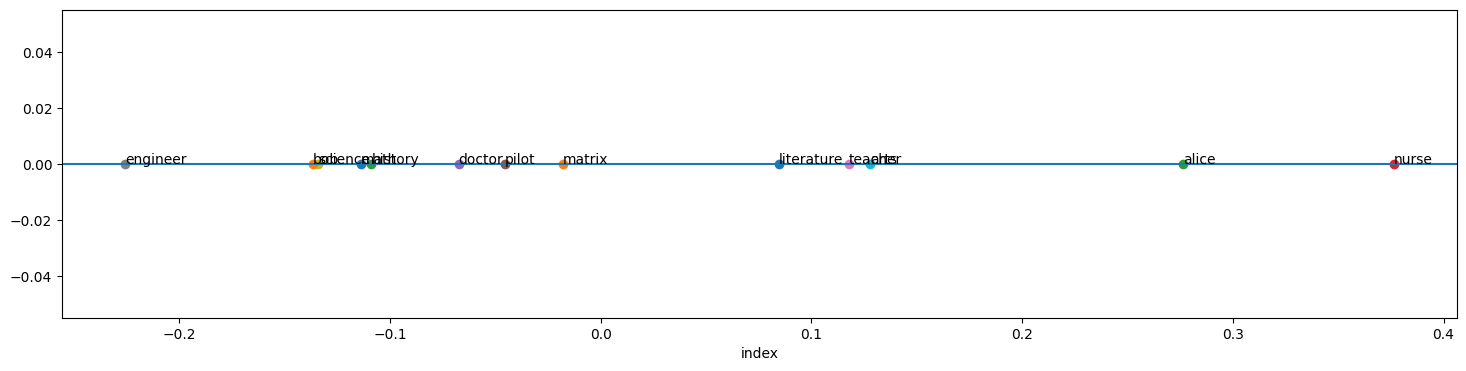

In [16]:
embeddingwords = ['math', 'matrix', 'history', 'nurse', 'doctor', 'pilot', 'teacher', 'engineer', 'science', 'arts', 'literature', 'bob', 'alice']

index = []

x_axis = []

for i in embeddingwords:
  for word, j in newdict.items():
    if word == i:
      index.append(j)
      break

for i in index:
  u = U1[i]
  proj = (u@v) / np.linalg.norm(v)

  x_axis.append(proj)

plt.figure(figsize=(2^16, 4))

for x, label in zip(x_axis, embeddingwords):
    plt.plot(x, 0, marker='o')
    plt.text(x, 0, label)

plt.axhline(0)

plt.xlabel('index')
plt.show()

What do I observe? Why is this the case? Do you see a potential problem in this?

# Part 5

Part a)

In [17]:
montreal = newdict["montreal"]
similarity = []
for i in range(10000):
  similarity.append(np.dot(V_norm[i] , V_norm[montreal]))

similarity_indices = np.argsort(similarity)[-11:-1][::-1]

for i in similarity_indices:
  print(words[i], end = ' ')

toronto vancouver winnipeg ottawa calgary edmonton detroit quebec atlanta seattle 

Part b)

In [18]:
with open('/content/gdrive/My Drive/analogy_task.txt') as file:
  lines = file.readlines()
  total_correct_guesses = 0
  wrong_guesses = []

  for line in lines:

    words_4 = list(string.strip() for string in line.split(' '))
    word1, word2, word3, correct_word = words_4
    v1,v2,v3,v4 = list(V_norm[newdict[word]] for word in words_4)
    v_unknown = v2 - v1 + v3

    similarity = []
    for i in range(10000):
      similarity.append(np.dot(V_norm[i] , v_unknown))

    guessed_word=''
    guessed_indices = np.argsort(similarity)[-6:][::-1]
    guessed_words = list(words[i] for i in guessed_indices if words[i] not in [word1, word2, word3])
    correct_word_index = newdict[correct_word]
    for i in guessed_indices:
      if words[i] in [word1, word2, word3]:
        continue
      else:
        guessed_word = words[i]
        break

    if guessed_word == correct_word:
      total_correct_guesses += 1

    if correct_word not in guessed_words:
      wrong_guesses.append(line.strip() + '. Guesses : ' + str(guessed_words))

In [19]:
print('Accuracy of',round(100 * total_correct_guesses/len(lines),2), '%')

Accuracy of 55.42 %


In [20]:
wrong_guesses[0]

"athens greece cairo egypt. Guesses : ['morocco', 'algeria', 'cyprus', 'turkey', 'tunisia', 'arabia']"

The model might have difficulty to differentiate similiar countries,

In [21]:
wrong_guesses[1177]

"running ran knowing knew. Guesses : ['realizing', 'realizes', 'feels', 'asks', 'believing']"

It might be difficult for the model to output a verb to the correct tense. Here the model guessed the good verb but at an incorrect tense.


In [22]:
wrong_guesses[472]

"cleveland ohio henderson nevada. Guesses : ['greene', 'stevens', 'harrison', 'adams', 'williamson', 'porter']"

Here the model has a hard time to differentiate betweent the name of a city and the name of a person, especially when they can be the same

Part c)

# SVD for image compression

In [23]:
from PIL import Image
image = Image.open('/content/gdrive/My Drive/p5_image.gif')
image_matrix = np.asarray(image)

## Part 1

We expect to see a bunch of similar vertical and horizontal lines when rank = 1. It is because when the rank of SVD is 1, all horizontal vectors of the image approximation are a combination of the only vector of U. Same thing with vertical lines and V.

For the moon image, we can expect a circumscribed square around the moon of color gray, while the rest of the image is black. This is bevause most lines in the image are identical or close to other lines in the image.

## Part 2

In [24]:
approximations = []
for k in [1, 3, 10, 20, 50, 100, 150, 200, 400, 800, 1170]:

  U, s, Vt = randomized_svd(image_matrix, n_components = k)

  a = np.round(np.dot(U[:,:k],np.diag(s[:k])).dot(Vt[:k, :]))

  approximations.append((a-a.min()) / (a.max()-a.min()))

Text(0.5, 1.0, 'Rank 150')

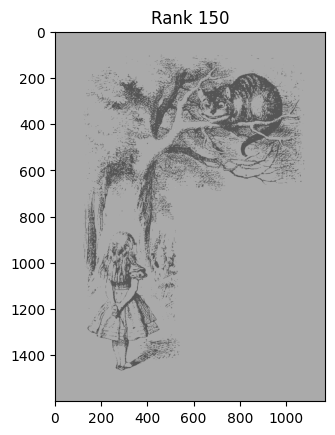

In [25]:
plt.imshow(np.uint8(approximations[6] * 255) , cmap = 'gray')
plt.title("Rank 150")

## Part 3

In [26]:
min(image_matrix.shape)

1170

This is because the rank of a matrix can not exceed the smaller of the number of rows (N) and the number of columns (D). In our case, it is 1170.

# Part 4

Naively saving the image as a matrix of pixel values (assuming each floating point number takes 1 unit of memory), this will be 1600 x 1170 = 1872000 units of memory. To efficiently store the rank 150 approximation, I need to calculate the size of each matrix in SVD = USVT. The size of the SVD will be k(m+n+1) = 150(1600+1170+1) = 415650 units of memory storing rank 150 approximation. This is much better since k is relatively smaller to big values of m and n.

# Part 5

Text(0.5, 1.0, 'Rank 800')

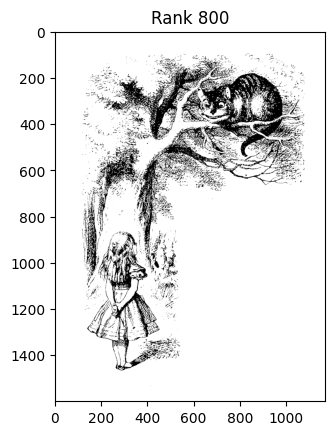

In [27]:
plt.imshow(np.uint8(approximations[9] * 255) , cmap = 'gray')
plt.title("Rank 800")

As noted in the question, the gray haze/random background noise, although subtle and way less noticeable than the lower values of K, the reason why this problem persists is because the iteration of approximation is much higher and are using much less singular values. Also, since this is a low-rank approximation, this tells us that a modest value of k (150) is enough to almost acheive the original. The more we add to the value of k, the low-rank approximation will throw out more haze and noise.

With reconstruction error, it can help alleviate the level of haze and the smaller levels eigenvalues will capture more and more noise and disruption in the image with a higher value of K. However, it is still a truncated SVD which means not using all 1170 will mean only the k eigenvectors will gather the structure and pattern of the image. So the eigenvectors will capture the most information first, and will still retain a level of haze, but decrease to zero as k gets higher and higher.